In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import tensorflow as tf

In [2]:
from urllib.request import urlretrieve
url = ("https://drive.usercontent.google.com/download?id=1mtigz-kMPtI_IJKUmsG_wqNIhuBFUGdu&export=download&authuser=0&confirm=t&uuid=fbe883a9-97f1-4237-8b9f-4aee4712c84e&at=APZUnTVj7nAISG9WUG9QLBkTD_9h%3A1712934384058")
filename = "test.zip"
urlretrieve(url, filename)

('test.zip', <http.client.HTTPMessage at 0x7c9ae0155870>)

In [3]:
!unzip -q test.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/model_2',compile=True)

In [6]:
class_indices={'baked_potato': 0,
 'baklava': 1,
 'caesar_salad': 2,
 'cheese_sandwich': 3,
 'cheesecake': 4,
 'chicken': 5,
 'chicken_curry': 6,
 'chocolate_cake': 7,
 'donuts': 8,
 'eggs': 9,
 'falafel': 10,
 'fish': 11,
 'french_fries': 12,
 'hamburger': 13,
 'hot_dog': 14,
 'ice_cream': 15,
 'lasagna': 16,
 'omelette': 17,
 'pizza': 18,
 'spaghetti': 19,
 'steak': 20,
 'sushi': 21}

In [12]:
from pathlib import Path
import imghdr
import os

data_dir = "/content/test"
image_extensions = [".png", ".jpg"]

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [13]:
image_dir=Path('/content/test')
filepaths=list(image_dir.glob(r'**/*.jpg'))
ds_test=pd.DataFrame(filepaths,columns=['Filepath']).astype(str)
ds_test

,Filepath
0,/content/test/af3cfd57-cd9.jpg
1,/content/test/c28b4089-293.jpg
2,/content/test/4a5d8fbb-ed3.jpg
3,/content/test/dd83d54f-86e.jpg
4,/content/test/584b6892-599.jpg
...,...
2195,/content/test/aa318837-8eb.jpg
2196,/content/test/1c975212-15b.jpg
2197,/content/test/cf0c8244-2a5.jpg
2198,/content/test/6c138be2-4c0.jpg


In [14]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.xception.preprocess_input,
)

test_images=test_generator.flow_from_dataframe(
    dataframe=ds_test,
    x_col='Filepath',
    y_col=None,
    target_size=(299,299),
    color_mode='rgb',
   class_mode=None,
    batch_size=32,
    shuffle=False,
)

Found 2200 validated image filenames.


In [15]:
predictions=np.argmax(loaded_model.predict(test_images),axis=1)

69/69 [==============================] - 987s 14s/step


In [16]:
predictions

array([20, 16,  0, ...,  5, 10,  6])

In [17]:
def maping_to_cat(x):
     for k,v in class_indices.items():
         if v==x:
             return k

In [18]:
predicted_labels=[maping_to_cat(x) for x in predictions]
predicted_labels

['steak',
 'lasagna',
 'baked_potato',
 'cheesecake',
 'eggs',
 'chicken_curry',
 'baked_potato',
 'donuts',
 'eggs',
 'omelette',
 'cheesecake',
 'cheese_sandwich',
 'spaghetti',
 'omelette',
 'baklava',
 'eggs',
 'cheesecake',
 'sushi',
 'sushi',
 'falafel',
 'baklava',
 'eggs',
 'baklava',
 'pizza',
 'chocolate_cake',
 'eggs',
 'hamburger',
 'cheese_sandwich',
 'lasagna',
 'eggs',
 'caesar_salad',
 'french_fries',
 'steak',
 'hamburger',
 'fish',
 'chicken_curry',
 'chocolate_cake',
 'falafel',
 'chicken_curry',
 'steak',
 'steak',
 'spaghetti',
 'baked_potato',
 'hamburger',
 'caesar_salad',
 'cheese_sandwich',
 'caesar_salad',
 'pizza',
 'cheese_sandwich',
 'hamburger',
 'chicken',
 'hamburger',
 'omelette',
 'ice_cream',
 'falafel',
 'chocolate_cake',
 'fish',
 'sushi',
 'sushi',
 'spaghetti',
 'hot_dog',
 'ice_cream',
 'ice_cream',
 'cheese_sandwich',
 'fish',
 'hamburger',
 'steak',
 'caesar_salad',
 'chicken_curry',
 'french_fries',
 'lasagna',
 'chicken_curry',
 'french_fries

In [19]:
df_temp=pd.DataFrame(predicted_labels,columns=['predicted'])
ds_test=pd.concat([ds_test,df_temp],axis=1)

In [20]:
ds_test

,Filepath,predicted
0,/content/test/af3cfd57-cd9.jpg,steak
1,/content/test/c28b4089-293.jpg,lasagna
2,/content/test/4a5d8fbb-ed3.jpg,baked_potato
3,/content/test/dd83d54f-86e.jpg,cheesecake
4,/content/test/584b6892-599.jpg,eggs
...,...,...
2195,/content/test/aa318837-8eb.jpg,sushi
2196,/content/test/1c975212-15b.jpg,fish
2197,/content/test/cf0c8244-2a5.jpg,chicken
2198,/content/test/6c138be2-4c0.jpg,falafel


In [24]:
def renameing(x):
   return x.split('/')[-1]
df_test=ds_test.copy()
df_test.Filepath=df_test.Filepath.apply(renameing)
df_test.rename(columns={'Filepath':'name'},inplace=True)
df_test


,name,predicted
0,af3cfd57-cd9.jpg,steak
1,c28b4089-293.jpg,lasagna
2,4a5d8fbb-ed3.jpg,baked_potato
3,dd83d54f-86e.jpg,cheesecake
4,584b6892-599.jpg,eggs
...,...,...
2195,aa318837-8eb.jpg,sushi
2196,1c975212-15b.jpg,fish
2197,cf0c8244-2a5.jpg,chicken
2198,6c138be2-4c0.jpg,falafel


In [28]:
df_test.to_csv('/content/drive/MyDrive/q1_submission.csv',index=False)

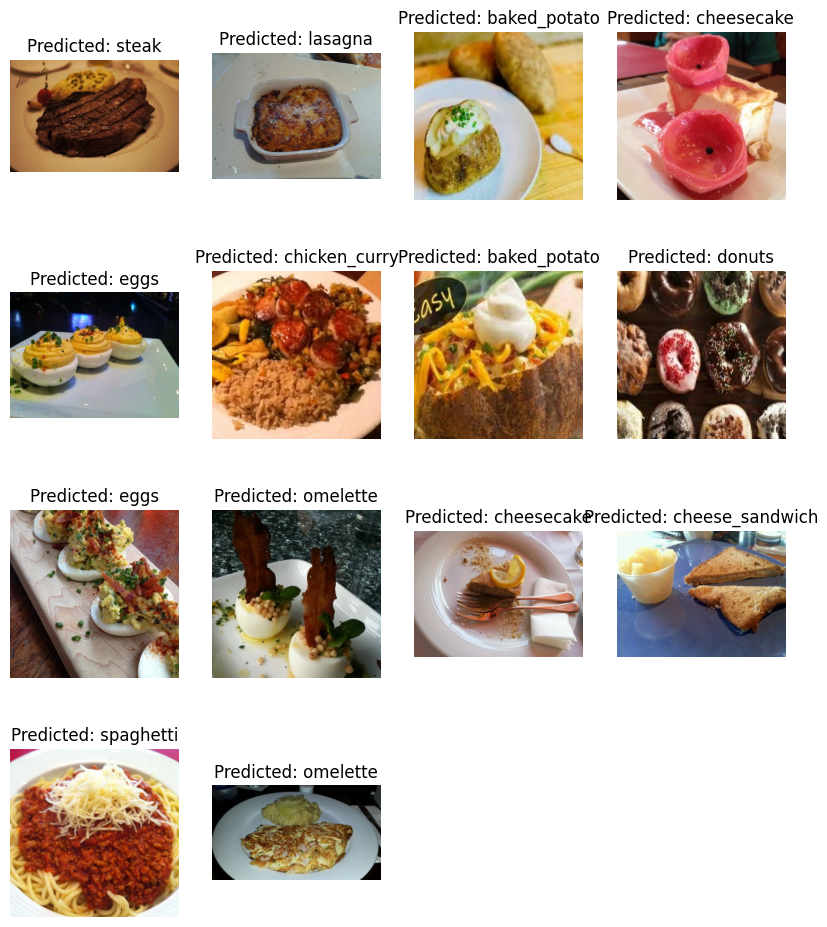

In [25]:
from matplotlib.image import imread
plt.figure(figsize=(10, 15))
for i in range(14):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(imread(ds_test.iloc[i,0]))
        plt.title('Predicted: '+ ds_test.iloc[i,1])
        plt.axis("off")